In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib as mpl

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
condition = df['value'] >= df['value'].quantile(0.025)
condition2 = df['value'] <= df['value'].quantile(0.975)
df_clean = df[condition & condition2]
#df_clean = df_clean[df_clean['value'] > df_clean['value'].quantile(0.975)]
df_clean
#df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


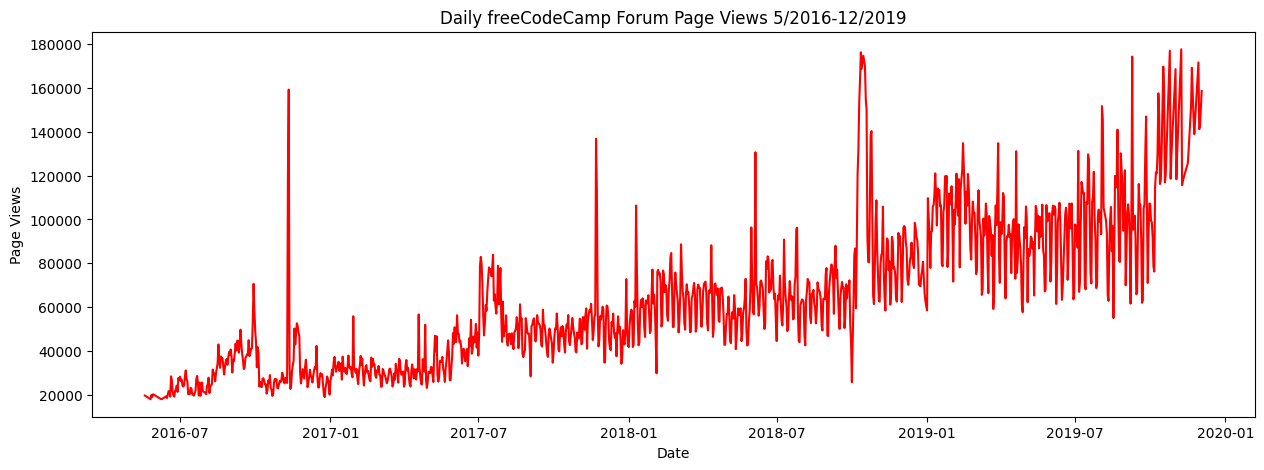

In [4]:
fig, ax = plt.subplots(figsize=(15,5))  # a figure with a single Axes
fig =plt.plot(df_clean.index, df_clean['value'], color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
g = ax.figure
# Save image and return fig (don't change this part)
g.savefig('line_plot.png')


In [96]:

df_bar.head(3)

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997


In [101]:
df_bar = df_clean.copy()
df_bar.reset_index(inplace=True)
# adds the missing months, seen here:  https://stackoverflow.com/questions/43408621/add-a-row-at-top-in-pandas-dataframe
new_rows = []
new_rows.insert(0, {'date': pd.to_datetime(
    '2016-01-01 00:00:00'), 'value': 0})
new_rows.insert(0, {'date': pd.to_datetime(
    '2016-02-01 00:00:00'), 'value': 0})
new_rows.insert(0, {'date': pd.to_datetime(
    '2016-03-01 00:00:00'), 'value': 0})
new_rows.insert(0, {'date': pd.to_datetime(
    '2016-04-01 00:00:00'), 'value': 0})

df_bar_with_empty_months = pd.concat([pd.DataFrame(new_rows), df_bar])
df_bar=df_bar_with_empty_months.set_index('date')
df_bar

,value
date,
2016-04-01,0
2016-03-01,0
2016-02-01,0
2016-01-01,0
2016-05-19,19736
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


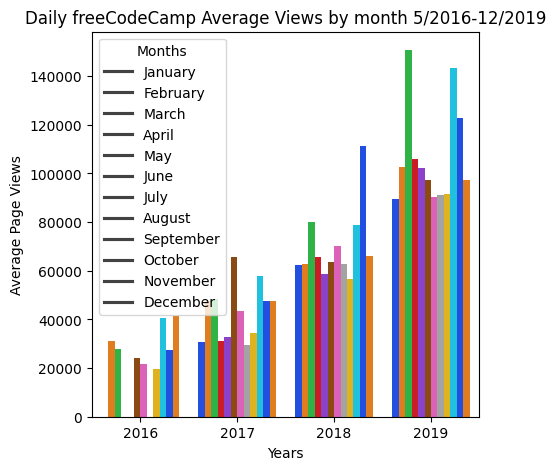

In [115]:
fig, ax = plt.subplots(figsize=(5,5))  # a figure with a single Axes
fig=sns.barplot(x="year",y="value",hue="month",data=df_bar, palette='bright')

#labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October','November','December']
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Months")
plt.legend(title="Months", loc='upper left', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October','November','December'])
ax.set_title('Daily freeCodeCamp Average Views by month 5/2016-12/2019')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
g = ax.figure


In [116]:
actual = len([rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
print(actual)

61


In [7]:
# Prepare data for box plots (this part is done!)
df_box = df_clean.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head(3)

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May


([<matplotlib.axis.YTick at 0x7f9c6012a260>,
 [Text(0, 0, '0.0'),
  Text(0, 200000, '0.2'),
  Text(0, 400000, '0.4'),
  Text(0, 600000, '0.6'),
  Text(0, 800000, '0.8'),
  Text(0, 1000000, '1.0')])

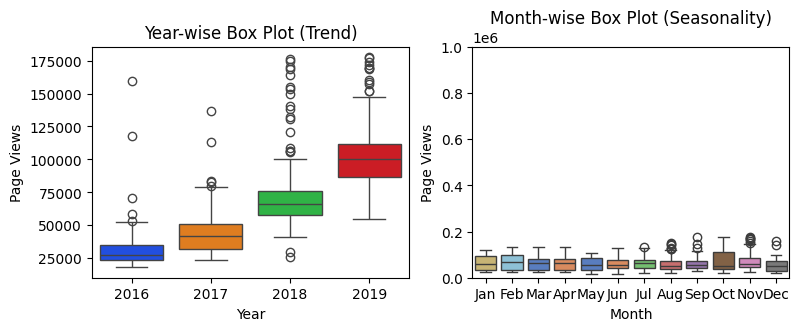

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(9,3))  # a figure with a single Axes
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[1].set_title('Month-wise Box Plot (Seasonality)')
fig = sns.boxplot(x=df_box['year'], hue=df_box['year'],legend=False, y=df_box['value'], ax=axs[0],palette='bright',)
fig = sns.boxplot(x=df_box['month'], hue=df_box['month'], legend=False, y=df_box['value'], ax=axs[1], palette='muted',order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Page Views')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Page Views')
axs[0].yticks([0, 200000, 400000, 600000, 800000, 1000000])

